# Data

Loan Status Data<br>
Objective: Predict if a Loan will be paid or will Default, i.e. NPA(Non performing Asset)<br>
17 columns - 10000 rows<br>
majority : miniority class = 78 : 22<br>
Evaluation Metric: Fbeta Score with Beta=0.2<br>

**Evaluation Metric Choice Justification:**<br>
Fbeta is the Harmonic Mean of Recall and Precision.

The objective of my Model is to predict if a loan will default or not. Objectives of Banks is to give out as much loan out as possible with out those loans going bad since interest rate on loan is how banks make a profit. Hence the prioity of the model is to detect correctly if a Loan will go bad as against a good loan. 
Hence my model has to correctly identify the a loan will go bad(i.e. 1) at the same time not penalise good customers and wrongly identifing them as defaulters. If good customers are also wrongly identified, bank loses out on a business opportunity. Hence these false positives are given more weightage and hence the very low(<1) beta score.
Also due to the imbalanced nature of the data set, fbeta score gives us a result between precision and recall. 
Hence my chosen metric is Fbeta Score.

# Result

Best Model: Decision Tree Classifier<br>
Best Mean Cross Validation Score is 0.864<br>
Best Mean Cross Validation params is {'class_weight': {0: 10, 1: 1}, 'max_depth': 4, 'splitter': 'random'}<br>
Train score is 0.866<br>
Test score is 0.853

In [292]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [ ]:
data = pd.read_csv('Loan.csv')
data=data.sample(frac=0.1)

In [968]:
data

,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
97048,b0086c9e-4a10-4bea-8859-862df5ed2928,Fully Paid,322344,Short Term,688.0,774668.0,NaN,Home Mortgage,Debt Consolidation,15816.17,20.0,55.0,8,0,458280,587642.0,0.0,0.0
30851,7ec84c14-9fe0-4f93-bf46-c314ba046c93,Fully Paid,440484,Short Term,NaN,NaN,2 years,Home Mortgage,Debt Consolidation,22096.05,10.0,80.0,8,0,80465,121154.0,0.0,0.0
64540,3bbd5629-2adc-4223-ab4c-f6c61f3d703b,Charged Off,266860,Short Term,7420.0,1152312.0,9 years,Home Mortgage,Debt Consolidation,12003.25,16.8,NaN,10,1,277191,563068.0,1.0,0.0
48011,3236d703-48a6-4788-8b34-21065435db2a,Charged Off,224466,Short Term,715.0,775409.0,10+ years,Rent,Debt Consolidation,15895.97,13.0,NaN,10,1,126426,227304.0,1.0,0.0
10610,f141ebb7-20da-4cdc-b7a3-9d3498d11781,Fully Paid,191026,Short Term,718.0,650636.0,10+ years,Rent,Debt Consolidation,14964.59,15.5,16.0,13,0,71896,429154.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69014,4c1347f5-73e1-472d-a6c0-df4d98bd0a56,Fully Paid,73920,Short Term,NaN,NaN,10+ years,Home Mortgage,Medical Bills,11415.20,13.6,NaN,9,0,200146,710908.0,0.0,0.0
1838,c1c626d1-2999-44b7-a488-fb242f8d28bd,Fully Paid,131846,Short Term,730.0,1518176.0,6 years,Own Home,Debt Consolidation,14675.60,15.6,7.0,16,0,118617,164890.0,0.0,0.0
4069,4b089a04-6eee-4166-ba7b-fab69d40ff3b,Fully Paid,599918,Long Term,NaN,NaN,1 year,Rent,Debt Consolidation,25647.15,17.5,NaN,11,0,323627,387090.0,0.0,0.0
98402,3617b2af-decb-4a2e-b9e5-6c601091c8fb,Fully Paid,258280,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,5630.65,21.0,NaN,11,0,159087,815100.0,0.0,0.0


In [740]:
#Percentage of Minority class in Target Variable
total=len(data.index)
count=0
perc=0
for i in data['Loan Status']:
    if i == 'Charged Off':
        count+=1
perc=(count*100)/total
print(perc)

22.639


In [718]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 79130 to 49114
Data columns (total 18 columns):
Customer ID                     10000 non-null object
Loan Status                     10000 non-null object
Current Loan Amount             10000 non-null int64
Term                            10000 non-null object
Credit Score                    8147 non-null float64
Annual Income                   8147 non-null float64
Years in current job            9584 non-null object
Home Ownership                  10000 non-null object
Purpose                         10000 non-null object
Monthly Debt                    10000 non-null float64
Years of Credit History         10000 non-null float64
Months since last delinquent    4693 non-null float64
Number of Open Accounts         10000 non-null int64
Number of Credit Problems       10000 non-null int64
Current Credit Balance          10000 non-null int64
Maximum Open Credit             10000 non-null float64
Bankruptcies             

In [719]:
for var in data.columns:
    print(var, data[var].unique(), '\n')

Customer ID ['426b7e6e-ddea-4342-b302-332cb1463016'
 '41f7c937-2f5f-4021-87e6-ab0fd7b62e18'
 '592c51bd-134c-4a94-9dd9-51523fc588be' ...
 '2fa112a2-d30c-47d2-984e-2827dcb26d9f'
 'e86b5ad6-5ae0-4b4a-9736-50657b906a6e'
 '6707b3e6-d84a-4121-a754-3f5263500d62'] 

Loan Status ['Fully Paid' 'Charged Off'] 

Current Loan Amount [242374 259512 312950 ... 356422 448140 308440] 

Term ['Short Term' 'Long Term'] 

Credit Score [ 740.   nan  710.  717.  697.  722.  709. 6930.  747.  745.  706.  687.
  718.  701.  708.  723.  746.  664.  741.  704.  651.  673.  737.  750.
  671.  719.  707.  725.  751.  721.  691.  694.  713.  699.  627.  729.
  736.  728.  731. 6900.  716.  624. 7060.  715.  700.  705.  724.  711.
  738.  683.  733.  720.  626.  742.  696.  712.  748.  735.  611.  744.
  681.  714.  690.  679.  743.  638.  692.  674. 7280.  730.  727. 7450.
  636.  666.  653.  676.  686.  732.  675.  734.  663. 7360.  657.  656.
 6300.  685.  680.  695.  702.  635.  739.  641.  628. 6410.  661.  68

In [720]:
data.isnull().mean()

Customer ID                     0.0000
Loan Status                     0.0000
Current Loan Amount             0.0000
Term                            0.0000
Credit Score                    0.1853
Annual Income                   0.1853
Years in current job            0.0416
Home Ownership                  0.0000
Purpose                         0.0000
Monthly Debt                    0.0000
Years of Credit History         0.0000
Months since last delinquent    0.5307
Number of Open Accounts         0.0000
Number of Credit Problems       0.0000
Current Credit Balance          0.0000
Maximum Open Credit             0.0000
Bankruptcies                    0.0018
Tax Liens                       0.0002
dtype: float64

In [721]:
data.dtypes

Customer ID                      object
Loan Status                      object
Current Loan Amount               int64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [1233]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Loan Status' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Loan Status' and var not in discrete]
categorical = [var for var in data.columns if data[var].dtype=='O']

In [1234]:
print(discrete)
print(continuous)
print(categorical)

['Number of Credit Problems', 'Bankruptcies', 'Tax Liens']
['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Current Credit Balance', 'Maximum Open Credit']
['Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


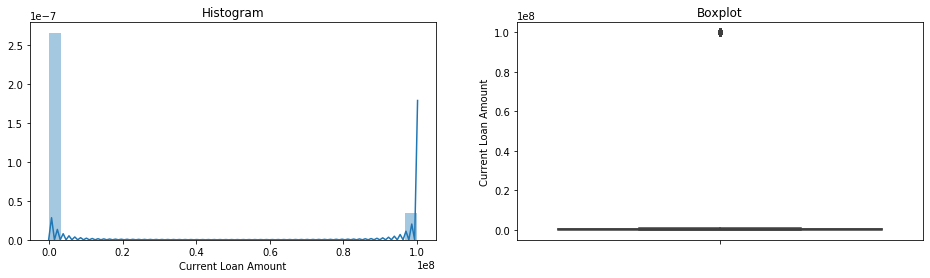

C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


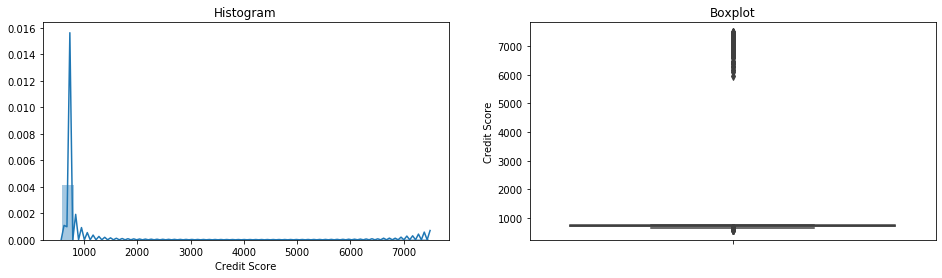

C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


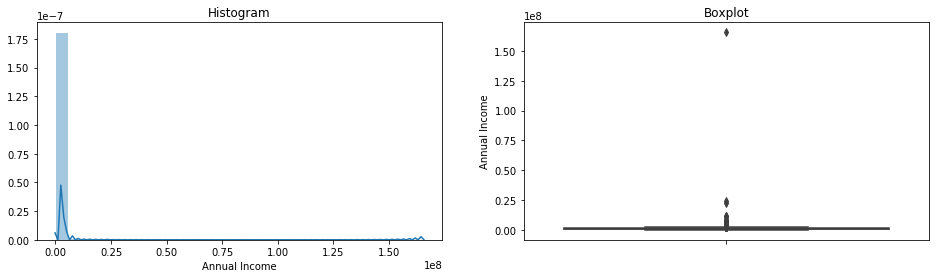

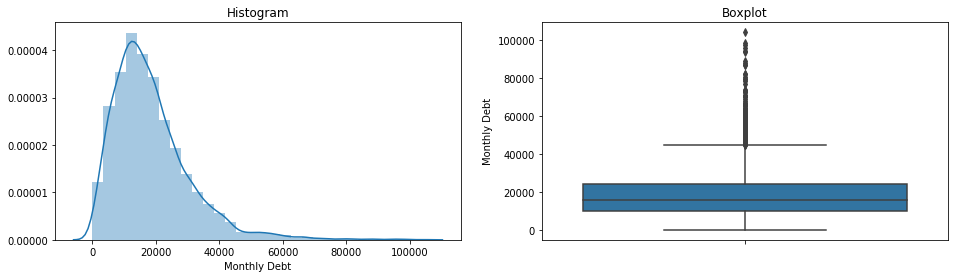

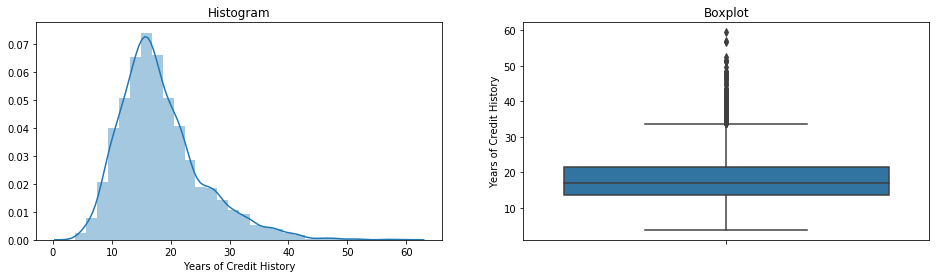

C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


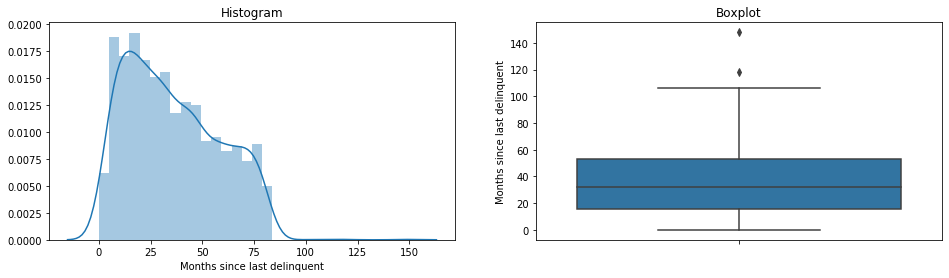

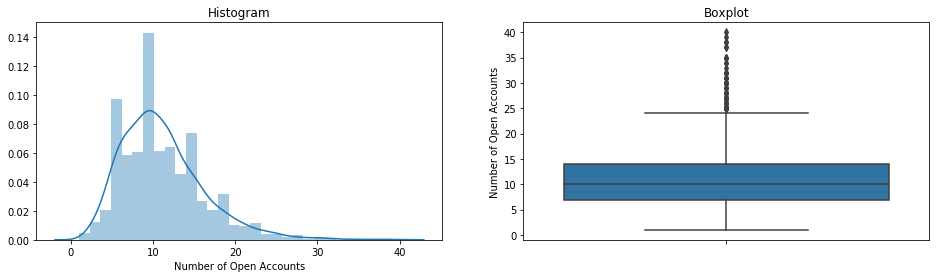

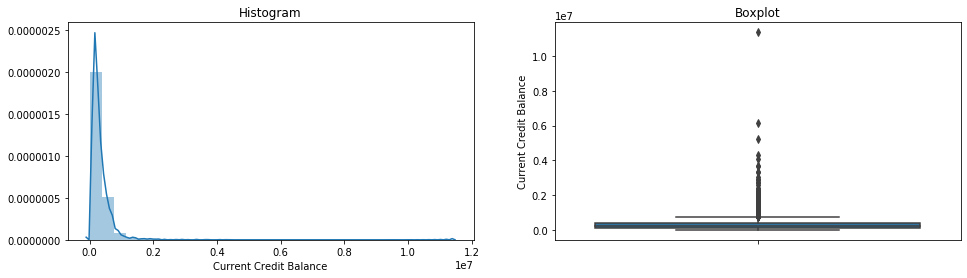

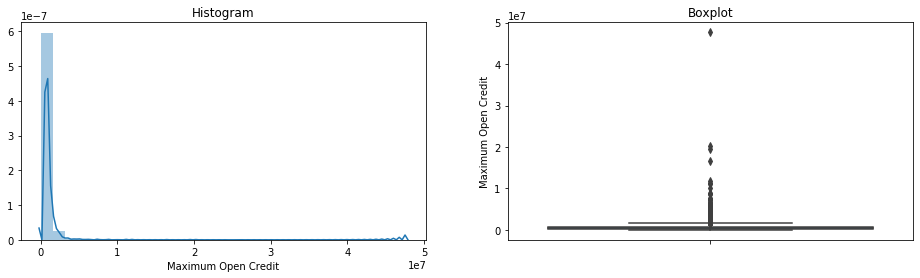

In [301]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
for var in continuous:
    diagnostic_plots(data, var)


In [1270]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Loan Status','Customer ID'], axis=1),
                                                    data['Loan Status'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

((9000, 16), (1000, 16))

In [1271]:
discrete = [var for var in X_train.columns if X_train[var].dtype!='O' and X_train[var].nunique()<10]
continuous = [var for var in X_train.columns if X_train[var].dtype!='O' and var not in discrete]
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']
numerical=continuous+discrete

In [1272]:
print(discrete)
print(continuous)
print(categorical)
print(numerical)

['Number of Credit Problems', 'Bankruptcies', 'Tax Liens']
['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Current Credit Balance', 'Maximum Open Credit']
['Term', 'Years in current job', 'Home Ownership', 'Purpose']
['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Current Credit Balance', 'Maximum Open Credit', 'Number of Credit Problems', 'Bankruptcies', 'Tax Liens']


# Preprocessing

In [1273]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import YeoJohnsonTransformer
from sklearn.preprocessing import StandardScaler
from feature_engine.discretisers import DecisionTreeDiscretiser
from feature_engine.variable_transformers import LogTransformer
from feature_engine import discretisers as dsc
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import OrdinalCategoricalEncoder
from feature_engine.variable_transformers import PowerTransformer
from feature_engine.discretisers import EqualFrequencyDiscretiser
from feature_engine.discretisers import EqualWidthDiscretiser
from sklearn.preprocessing import RobustScaler
from feature_engine.categorical_encoders import CountFrequencyCategoricalEncoder
from feature_engine.variable_transformers import BoxCoxTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [1274]:
loan_pipe = Pipeline([
    
 ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean',variables=['Credit Score','Annual Income','Months since last delinquent','Bankruptcies','Tax Liens'])),
 ('imputer_dis', mdi.FrequentCategoryImputer(variables=['Years in current job'])),
 ('trans', PowerTransformer(variables=continuous)),
 ('desc', EqualWidthDiscretiser(bins=50, variables = numerical)), 
 ('categorical_encoder', OneHotCategoricalEncoder( top_categories=None, variables=categorical, drop_last=True)),
 ('robustscaler', RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100)))
])

In [1275]:
loan_pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Credit Score', 'Annual Income',
                                              'Months since last delinquent',
                                              'Bankruptcies', 'Tax Liens'])),
                ('imputer_dis',
                 FrequentCategoryImputer(variables=['Years in current job'])),
                ('trans',
                 PowerTransformer(exp=0.5,
                                  variables=['Current Loan Amount',
                                             'Credit Score', 'Annual Income',...
                                                  'Current Credit Balance',
                                                  'Maximum Open Credit',
                                                  'Number of Credit Problems',
                                                  'Bankruptcies',
                           

In [1276]:
X_train=loan_pipe.transform(X_train)
X_test=loan_pipe.transform(X_test)

In [1277]:
#To convert target variable to 0 and 1
y_t1 = []
for i in y_train:
    if i == "Charged Off":
        y_t1.append(1)
    elif i == "Fully Paid":
        y_t1.append(0)
y_train = y_t1

y_t2 = []
for i in y_test:
    if i == "Charged Off":
        y_t2.append(1)
    elif i == "Fully Paid":
        y_t2.append(0)
y_test = y_t2       

In [1278]:
#Custom function for scoring
def scoring(m):
    train_preds=m.predict(X_train)
    test_preds= m.predict(X_test)
    test_preds
    x_t1 = []
    for i in train_preds:
        if i == "Charged Off":
            x_t1.append(1)
        elif i == "Fully Paid":
            x_t1.append(0)
    x_train1 = x_t1       
    train_preds=x_train1
    x_t = []
    for i in test_preds:
        if i == "Charged Off":
            x_t.append(1)
        elif i == "Fully Paid":
            x_t.append(0)
    x_test1 = x_t       
    test_preds=x_test1
   
    from sklearn.metrics import recall_score
    print("The test score is:{:.3f}".format(fbeta_score(y_test,test_preds,beta=0.2)))
    print("The train score is:{:.3f}".format(fbeta_score(y_train,train_preds,beta=0.2)))


In [1287]:
#Scorer Defined
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=0.2)

# Basic Models

In [1263]:
# Naive Algorithm 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
params = {
            'strategy':['stratified','most_frequent','prior','uniform']
         }
model_dummy = GridSearchCV(DummyClassifier(random_state=123), params, cv=5, return_train_score = True)
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check test data set performance
print("Naive Algorithm Test Performance: ", model_dummy.score(X_test,y_test))
print("Best parameters: {}".format(model_dummy.best_params_))




Mean Cross-validation scores: 0.774

Naive Algorithm Test Performance:  0.808
Best parameters: {'strategy': 'most_frequent'}


In [1315]:
#Logistic Regression
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression(solver='newton-cg').fit(X_train, y_train1)

cv_scores = cross_val_score(clf, X_train, y_train1)
train_preds=clf.predict(X_train)
test_preds= clf.predict(X_test)
# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance: ", fbeta_score(y_test,test_preds,beta=0.2))


Mean Cross-validation scores: 0.8186666666666665

Logistic.coef_: [[-3.83207042  5.99980655 -2.90799185  0.14412625 -0.59317261 -0.35517427
   0.14775951  0.07855292  0.08778339 -1.27624846  0.08104969  0.44013057
  -0.65711096  0.05653064  0.06461207  0.20195594 -0.09608377 -0.02878281
   0.07534289 -0.06226658  0.19175742  0.00819395  0.06154522  0.01364929
  -0.21374283 -0.12242001 -0.04039668 -0.0170728  -0.51048111 -0.37975288
   1.17301271  0.51042638 -0.16822899 -0.45182967 -0.54327201 -0.09673974
  -0.06839907 -0.0468899   0.31756026  0.08876654  0.52510158]]
Logistic.intercept_: [-0.27857523]
Logistic Performance:  0.8571428571428571


In [1265]:
# Logistic regression model with hyperparameter tuning

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
clf = LogisticRegression(dual=False).fit(X_train, y_train)
params = { 'penalty':['l2'], 
          'fit_intercept':[True,False],
          'class_weight':[dict,'balanced'], 'solver':['newton-cg','liblinear', 'sag', 'saga']}
grid_lg = GridSearchCV(clf, params, cv=5, return_train_score = True)
grid_lg.fit(X_train, y_train)
test_preds=grid_lg.predict(X_test)

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)
print()
print("Best parameters: {}".format(grid_lg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_lg.best_score_))
print("Logisitc Model score: {:.2f}".format(fbeta_score(y_test,test_preds,beta=0.2)))


C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: object of type 'type' has no len()

  FitFailedWarning)
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: object of type 'type' has no len()

  FitFailedWarning)
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: object of type 'type' has no len()

  FitFailedWarning)
C:\Users\V M HAREENDRAN\Anaconda3\envs\buan6341_2020\lib\site-pa

Logistic.coef_: [[-3.83534835  6.00063261 -2.90627609  0.14385848 -0.59298014 -0.35521888
   0.14710228  0.07783284  0.08659374 -1.26979267  0.08224473  0.44093003
  -0.65717066  0.05653248  0.06467354  0.20202108 -0.09591426 -0.02882477
   0.07560338 -0.06199622  0.19199084  0.00805476  0.06163064  0.01402459
  -0.21341569 -0.12215494 -0.04106945 -0.01768031 -0.5114578  -0.38071094
   1.17209303  0.50916824 -0.16891966 -0.45909784 -0.5430515  -0.09722884
  -0.06994178 -0.04443884  0.31651267  0.08778057  0.52670834]]
Logistic.intercept_: [-0.27811183]

Best parameters: {'class_weight': <class 'dict'>, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation score: 0.82
Logisitc Model score: 0.86


In [1267]:
#KNN Model

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(5,25)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True,scoring=ftwo_scorer)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.71

KNN parameters:  {'n_neighbors': 20}
KNN Test Performance:  0.7016491754122938


In [1305]:
#KNN Model with Hyperparamter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_knn = {'n_neighbors': range(1,25), 'weights': ['uniform','distance'], 
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size':[10,20,30,40,50]}
grid_knn1 = GridSearchCV(knn, param_knn, cv=5, return_train_score=True,scoring=ftwo_scorer)
grid_knn1.fit(X_train, y_train)

print("Best parameters: {}".format(grid_knn1.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_knn1.best_score_))
print("KNN Test Performance: ", grid_knn1.score(X_test,y_test))

Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 24, 'weights': 'distance'}
Best cross-validation score: 0.73
KNN Test Performance:  0.7008086253369272


In [1344]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True,scoring=ftwo_scorer)
grid_dtree.fit(X_train, y_train)
print("Best Mean Cross-validation score: {:.3f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.864

Decision Tree parameters:  {'max_depth': 1}
Decision Tree Performance:  0.8528584817244611


In [1350]:
#Decision Tree with hyperparameter tuning
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',random_state=0)
param_DT = {'splitter':['best','random'],"max_depth": range(1,20),'class_weight':[{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},'balanced']}
grid_dtree1 = GridSearchCV(dtree, param_DT, cv=5, return_train_score = True,scoring=ftwo_scorer)
grid_dtree1.fit(X_train, y_train)
print("Best Mean Cross-validation score: {:.3f}".format(grid_dtree1.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree1.best_params_)
print("Decision Tree Train Performance: ", grid_dtree1.score(X_train,y_train))
# Check test data set performance
print("Decision Tree Test Performance: ", grid_dtree1.score(X_test,y_test))

Best Mean Cross-validation score: 0.864

Decision Tree parameters:  {'class_weight': {0: 10, 1: 1}, 'max_depth': 4, 'splitter': 'random'}
Decision Tree Train Performance:  0.8660251665433013
Decision Tree Test Performance:  0.8528584817244611


In [1290]:
#SVM
from sklearn.svm import SVC
param_grid = [{'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid, cv=5, n_jobs=2, return_train_score=True,scoring=ftwo_scorer)
grid_svc.fit(X_train, y_train)
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("Linear SVM Performance: ", grid_svc.score(X_test,y_test))

Best parameters: {'C': 0.01, 'kernel': 'linear'}
Best cross-validation score: 0.86
Linear SVM Performance:  0.8528584817244611


In [1291]:
#SVM with kernel
from sklearn.svm import SVC
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid, cv=5, n_jobs=2, return_train_score=True,scoring=ftwo_scorer)
grid_svc.fit(X_train, y_train)
#Model Performance
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("SVM Performance: ", grid_svc.score(X_test,y_test))

Best parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.86
SVM Performance:  0.8528584817244611


In [ ]:
#Computational time too High
from sklearn.svm import SVC
param_grid = [{'kernel': ['sigmoid'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid, cv=5, n_jobs=2, return_train_score=True,scoring=ftwo_scorer)
grid_svc.fit(X_train, y_train)


#Model Performance
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("Linear SVM Performance: ", grid_svc.score(X_test,y_test))

In [ ]:
#Computational time too High
from sklearn.svm import SVC
param_grid = [{'kernel': ['poly'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid, cv=5, n_jobs=2, return_train_score=True,scoring=ftwo_scorer)
grid_svc.fit(X_train, y_train)


#Model Performance
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svc.best_score_))
print("Linear SVM Performance: ", grid_svc.score(X_test,y_test))

In [ ]:
#Bagging with decision tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'base_estimator__criterion': ['gini','entropy'],
                 'base_estimator__splitter': ['best','random'],
                 'base_estimator__max_features': ['auto','sqrt','log2'],
                 'max_samples':  [0.8,1],
                 'n_estimators': [20,25,50]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True )
bag_dtree1_grid.fit(X_train,y_train)

In [1292]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Model Performance')
scoring(bag_dtree1_grid)

Best Mean Cross Validation Score is 0.8193333333333331
Best Mean Cross Validation Score is {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 9, 'base_estimator__max_features': 'auto', 'base_estimator__splitter': 'random', 'max_samples': 0.8, 'n_estimators': 25}
Model Performance
The test score is:0.853
The train score is:0.867


In [ ]:
#Bagging with logistic regression (Previously obtained best model)
bag_logreg1 = BaggingClassifier(base_estimator=LogisticRegression(C=1, class_weight='dict', dual=False, fit_intercept= False, penalty='l2', solver='saga'), bootstrap=True, random_state=0, oob_score=True)

bag_logreg1_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [25,50,100,150]}
bag_logreg1_grid = GridSearchCV(bag_logreg1, bag_logreg1_param,cv=5, return_train_score=True )
bag_logreg1_grid.fit(X_train,y_train)

In [1293]:
print(f'Best Mean Cross Validation Score is {bag_logreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_logreg1_grid.best_params_}')
print(f'Model Peformance is:')
scoring(bag_logreg1_grid)

Best Mean Cross Validation Score is 0.8188888888888888
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 50}
Model Peformance is:
The test score is:0.857
The train score is:0.863


In [ ]:
#Pasting with Decision Tree
paste_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True, )
paste_dtree1_grid.fit(X_train,y_train)

In [1294]:
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Model Peformance is:')
scoring(paste_dtree1_grid)

Best Mean Cross Validation Score is 0.8187777777777778
Best Mean Cross Validation Score is {'base_estimator__max_depth': 5, 'max_samples': 0.8, 'n_estimators': 10}
Model Peformance is:
The test score is:0.857
The train score is:0.865


In [ ]:
#Pasting with Decision tree with predefined Hyperparamters
paste_dtree2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=False, random_state=0, oob_score=False)

paste_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree2_grid = GridSearchCV(paste_dtree2, paste_dtree2_param,cv=5, return_train_score=True, )
paste_dtree2_grid.fit(X_train,y_train)

In [1295]:
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_params_}')
print(f'Model Peformance is:')
scoring(paste_dtree2_grid)

Best Mean Cross Validation Score is 0.8186666666666668
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 10}
Model Peformance is:
The test score is:0.853
The train score is:0.865


In [ ]:
#Pasting with logistic regression (Previously obtained best model)
#Computational time too High
paste_logreg1 = BaggingClassifier(base_estimator=LogisticRegression(C=1, class_weight='dict', dual=False, fit_intercept= True, penalty='l2', solver='newton-cg'), bootstrap=False, random_state=0, oob_score=False)

paste_logreg1_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_logreg1_grid = GridSearchCV(paste_logreg1, paste_logreg1_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
paste_logreg1_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')

In [ ]:
#Randomforest Regressor
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
     'criterion': ['gini','entropy'],
    'n_estimators': [100,200,500,700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(1,10),
    'bootstrap':[True,False],
   
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)

In [1296]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Model Peformance is:')
scoring(rfc_grid)

Best Mean Cross Validation Score is 0.8190000000000002
Best Mean Cross Validation Score is {'bootstrap': False, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 500}
Model Peformance is:
The test score is:0.857
The train score is:0.871


In [ ]:
#ExtraTrees
from  sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, )
etc_grid.fit(X_train,y_train)


In [1297]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Model Peformance is:')
scoring(etc_grid)

Best Mean Cross Validation Score is 0.818888888888889
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Model Peformance is:
The test score is:0.857
The train score is:0.869


In [ ]:
#Gradient Boosting
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'loss': ['deviance','exponential'],
              'max_depth': range(1,10),
              'n_estimators' : [100,150],
              'learning_rate' : [0.001,0.01,0.5,1.0,2],
              'max_features':['auto','sqrt','log2']
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, )
gbc_grid.fit(X_train,y_train)


In [1299]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Model Peformance is:')
scoring(gbc_grid)

Best Mean Cross Validation Score is 0.819
Best Mean Cross Validation Score is {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 150}
Model Peformance is:
The test score is:0.857
The train score is:0.871


In [ ]:
#XGboost
from xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2)
xgbc_param = {
              'max_depth' : range(1,10),
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
              'min_child_weight' : range(1,10),
              'subsample':[0.6,0.7,0.8,0.9,1],
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)

In [1300]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Model Peformance is:')
scoring(xgbc_grid)

Best Mean Cross Validation Score is 0.82
Best Mean Cross Validation Score is {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Model Peformance is:
The test score is:0.838
The train score is:0.866


In [1349]:
classifiers={'knn':grid_knn ,
             'logreg':grid_lg,
             'dtree':grid_dtree,
             'dtree1':grid_dtree1,
             'bag_dtree1':bag_dtree1_grid,
             'bag_logreg1':bag_logreg1_grid,
             'paste_dtree1': paste_dtree1_grid,
             'paste_dtree2':paste_dtree2_grid,
             'rfc': rfc_grid ,
             'etrees':etc_grid,
             'gbc':gbc_grid,
             'xgbc': xgbc_grid,
            }
classifiers.keys()
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
3,dtree1,0.864451,0.010881
2,dtree,0.864312,0.010550
12,sc,0.861967,0.004382
13,sc1,0.857257,0.012567
11,xgbc,0.820000,0.003315
4,bag_dtree1,0.819333,0.003658
8,rfc,0.819000,0.003709
10,gbc,0.819000,0.003247
9,etrees,0.818889,0.003549
5,bag_logreg1,0.818889,0.002789


In [1348]:
#Stacking Classifier
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators=
                              [('dtree1',grid_dtree1.best_estimator_),
                               ('dtree',grid_dtree.best_estimator_),
                               ('xgbc', xgbc_grid.best_estimator_), 
                               ('bag_dtree1',bag_dtree1_grid.best_estimator_),
                               ('gbc', gbc_grid.best_estimator_), 
                               ('rfc', rfc_grid .best_estimator_),
                               #('etrees',etc_grid.best_estimator_),
                              ], final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba'],
               'passthrough':[True,False] 
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
sclf1_grid.fit(X_train,y_train)
test_preds=sclf1_grid.predict(X_test)

print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.8619666238758382
Best Mean Cross Validation Score is {'final_estimator__C': 0.1, 'passthrough': True, 'stack_method': 'auto'}
Train score is 0.8691558959629807
Test score is 0.837958818263205


# Cost Sensitive Algorithms

In [1114]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score, make_scorer
precision1= make_scorer(precision_score)

In [1306]:
#cost sensitive logistic regession
param_grid = {   
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},'balanced'],
}
#apply grid search
cgrid_logreg= GridSearchCV(LogisticRegression(solver='newton-cg'), param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
cgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_logreg.best_score_))

Best parameters: {'class_weight': {0: 10, 1: 1}}
Best Mean cross-validation score: 0.86


In [1307]:
#svc
param_grid = {
      'class_weight':[{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},'balanced']
}
#apply grid search
cgrid_svc= GridSearchCV(SVC(), param_grid, cv=5, n_jobs=2,scoring=ftwo_scorer)
cgrid_svc.fit(X_train, y_train1)

print("Best parameters: {}".format(cgrid_svc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_svc.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 1}}
Best Mean cross-validation score: 0.86


In [1308]:
#decison tree
param_grid = { 
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100},'balanced'],
}
#apply grid search
cgrid_dtree= GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
cgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_dtree.best_score_))

Best parameters: {'class_weight': {0: 1, 1: 100}}
Best Mean cross-validation score: 0.41


In [1309]:
#xgb
param_grid = { 
    'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
}
#apply grid search
cgrid_xgboost= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring=ftwo_scorer)
cgrid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(cgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(cgrid_xgboost.best_score_))

Best parameters: {'scale_pos_weight': 1}
Best Mean cross-validation score: 0.63


In [1310]:
#random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)

print('Score: %.3f' % scores.mean())

Score: 0.785


In [1311]:
#extratrees
rf = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rf, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)

print('Score: %.3f' % scores.mean())

Score: 0.645


In [1312]:
#Bagging decision tree with under sampling
from imblearn import under_sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(b_dtree, X_train, y_train, scoring=ftwo_scorer, cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.401


# Data Sampling Algorithms

In [1324]:
#logistic regression
pipe_roc_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression(solver='saga'))])
param_roc_lg = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_lg= GridSearchCV(pipe_roc_lg,param_roc_lg, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_lg.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_lg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_lg.best_score_))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.37


In [1317]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
#decisiontreee
pipe_roc_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_roc_dtree = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_dtree= GridSearchCV(pipe_roc_dtree,param_roc_dtree, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_dtree.best_score_))

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.81


In [1318]:
#knn
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_roc_knn = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_knn= GridSearchCV(pipe_roc_knn,param_roc_knn, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_knn.best_score_))

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.33


In [1319]:
#svm
pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',SVC(C=10,gamma=0.1,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2,scoring=ftwo_scorer)
ogrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_svm.best_score_))

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.37


In [1320]:
#randomforest
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=50,criterion='gini',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4,5],
                'rf__max_depth' : [4,5]}

ogrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2,scoring=ftwo_scorer)
ogrid_rf.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_rf.best_score_))

Best parameters: {'rf__max_depth': 5, 'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.43


In [1321]:
#xgb
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                            n_estimators=100,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 4,
                                                                             ))])
param_roc_xgb = {'smote__k_neighbors': [1,2,3,4,5],
                 'xgb__learning_rate' : [0.1,0.5]}

ogrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_xgb.best_score_))

Best parameters: {'smote__k_neighbors': 4, 'xgb__learning_rate': 0.1}
Best Mean cross-validation score: 0.82


In [1322]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}

ogrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring=ftwo_scorer)
ogrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(ogrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(ogrid_ee.best_score_))

Best parameters: {'smote__k_neighbors': 5}
Best Mean cross-validation score: 0.63


In [1328]:
#top 5 estimators
estimators_ = [('dtree',ogrid_dtree.best_estimator_),
            ('rf',ogrid_rf.best_estimator_),('ee',ogrid_ee.best_estimator_),
            ('lg',ogrid_lg.best_estimator_),('xgb',ogrid_xgb.best_estimator_)]
from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring=ftwo_scorer )
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8572573169780526
Best Mean Cross Validation params is {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.8660406132113333
Test score is 0.837958818263205
